In [1]:
#IS5126 GROUP PROJECT
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
#/content/drive/MyDrive/IS5126 Project
path="/content/drive/MyDrive/IS5126 Project"
os.chdir(path)
os.listdir(path)

['UserBehavior.csv',
 'UserBehavior.csv.zip.md5',
 'UserBehavior.csv.zip',
 'SelectedUserBehavior.csv',
 'funnel_example.html',
 'render.html',
 'action_data.csv',
 'node_modules',
 'package.json',
 'Plan.gdoc',
 'taobao_data_app.py',
 'package-lock.json',
 'CleanedUserBehavior.csv',
 'Code.ipynb',
 'Group12_FinalProjectPPT.gslides',
 'Group12_FinalProjectReport.gdoc',
 'Code_v1.ipynb']

# 1. Data collection and processing

## 1.1 Get original data and randomly select partial data for further analysis

In [ ]:
#load csv file
import pandas as pd
column_names = ["userID","itemID","categoryID","behavior","timeStamp"]
df = pd.read_csv("./UserBehavior.csv",
                 names = column_names)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.nunique()

In [ ]:
#Data Cleaning
#check missing value and repeat records.
df.isnull().sum()

In [ ]:
#Check the range and value of column userID
#Will select only quarter of records based on randomly selected userIDs
#For the data is too big.
userid_min = df["userID"].min()
userid_max = df["userID"].max()
num_userid = df["userID"].nunique()
print(userid_min)
print(userid_max)
print(num_userid)

In [ ]:
#Select 1/4 users from record for analysis
import random
start = 1
end = 1018011
num_to_select = (end - start + 1 )//4
selected_users = random.sample(range(start,end+1), num_to_select)

In [ ]:
selected_users.sort()
selected_users

In [ ]:
#Select records where userID in selected_users.
selected_df = df[df['userID'].isin(selected_users)]
selected_df.info()

In [ ]:
selected_df["userID"].nunique()

In [ ]:
selected_df.head()

In [ ]:
#Convert timeStamp from unix time stamp to human readable date and time.
import datetime
selected_df["timeStamp"] = pd.to_datetime(df['timeStamp'],unit='s')+datetime.timedelta(hours=8)#Convert to GMT+8
selected_df.head()

In [ ]:
#convert timeStamp colomu to date and time
selected_df["date"] = selected_df["timeStamp"].dt.date
selected_df["Time"] = selected_df["timeStamp"].dt.time
selected_df.head()

In [ ]:
#Check duplication
#Should be down before select users.
#However, it is more efficient to do it after selection, for smaller data size.
duplicated_rows = selected_df.duplicated().sum()
duplicated_rows

In [ ]:
#Drop duplicated rows
selected_df.drop_duplicates()

In [ ]:
#Reorder and re-index the df, removing timeStamp colomn.
selected_df = selected_df.drop("timeStamp",axis=1)
selected_df = selected_df.sort_values(by = "userID")
selected_df = selected_df.reset_index(drop=True)

In [ ]:
selected_df.head()

In [ ]:
selected_df.info()

In [ ]:
#Stored the dataframe
selected_df.to_csv("./SelectedUserBehavior.csv")

## 1.2 Clean the data and handle irrelevant data/outliers

In [4]:
#load csv file
data = pd.read_csv("./SelectedUserBehavior.csv")
data.head()

,Unnamed: 0,userID,itemID,categoryID,behavior,date,Time
0,0,4,4495787,4801426,pv,2017-11-29,11:57:39
1,1,4,2067161,982926,cart,2017-11-28,20:43:58
2,2,4,4792603,982926,pv,2017-11-28,20:41:43
3,3,4,1317711,982926,pv,2017-11-28,20:41:29
4,4,4,2102225,4145813,buy,2017-11-28,20:37:43


In [5]:
# drop the unnecessary colume
data = data.drop('Unnamed: 0', axis=1)

In [6]:
# select the valid date range data only, as the data is provided between 2017-11-25 and 2017-12-03
data = data[(data['date'] >= '2017-11-25') & (data['date'] <=  '2017-12-03')]

In [7]:
# check the date range
min_date = data['date'].min()
max_date = data['date'].max()
print(f"date range is from {min_date} to {max_date}")

date range is from 2017-11-25 to 2017-12-03


In [8]:
#Handle irrelevant data
#We assume that customers must view a page before buying any items
#So we consider records of buying a product without view the page irrelevant or outliers.
#First combine date and time to get complete timestamp
data["timeStamp"] = pd.to_datetime(data['date'] + ' ' + data['Time'])
data.head()

,userID,itemID,categoryID,behavior,date,Time,timeStamp
0,4,4495787,4801426,pv,2017-11-29,11:57:39,2017-11-29 11:57:39
1,4,2067161,982926,cart,2017-11-28,20:43:58,2017-11-28 20:43:58
2,4,4792603,982926,pv,2017-11-28,20:41:43,2017-11-28 20:41:43
3,4,1317711,982926,pv,2017-11-28,20:41:29,2017-11-28 20:41:29
4,4,2102225,4145813,buy,2017-11-28,20:37:43,2017-11-28 20:37:43


In [9]:
#sort the df by userid, itemid, and timestamp
data = data.sort_values(by=['userID', 'itemID', 'timeStamp'])
data.head()

,userID,itemID,categoryID,behavior,date,Time,timeStamp
47,4,207,3299155,cart,2017-11-28,20:50:18,2017-11-28 20:50:18
42,4,207,3299155,pv,2017-11-28,20:57:34,2017-11-28 20:57:34
170,4,207,3299155,pv,2017-11-29,12:40:02,2017-11-29 12:40:02
114,4,31827,982926,pv,2017-11-29,00:13:45,2017-11-29 00:13:45
136,4,127749,2465336,pv,2017-11-28,19:11:36,2017-11-28 19:11:36


In [10]:
#Suppose the first record of a user and an item is not pv, we consider the data not usable
#For we made the assumption that the user must first view the page before any other action
#The pv could be either missing or not in the period of data collection.
counts = data.groupby(['userID', 'itemID']).size().reset_index(name='count')

In [11]:
single_occurrences = counts[counts['count'] == 1][['userID', 'itemID']]
multi_occurrences = counts[counts['count'] > 1][['userID', 'itemID']]

In [12]:
#Valid records if appear once and behavior is "pv"
single_valid = data.merge(single_occurrences, on=['userID', 'itemID']).query("behavior == 'pv'")

In [13]:
df_multi = data.merge(multi_occurrences, on=['userID', 'itemID'], how='inner')

In [14]:
#Check validity for multi-occurence by check if first behavior is pv
first_occurrences = df_multi.drop_duplicates(subset=['userID', 'itemID'], keep='first')

In [15]:
multi_valid = df_multi.merge(first_occurrences[first_occurrences['behavior'] == 'pv'][['userID', 'itemID']], on=['userID', 'itemID'], how='inner')

In [16]:
filtered_df = pd.concat([single_valid, multi_valid])

In [17]:
data = filtered_df.sort_values(by=['userID', 'itemID', 'timeStamp'])

In [ ]:
data.head()

,userID,itemID,categoryID,behavior,date,Time,timeStamp
0,4,31827,982926,pv,2017-11-29,00:13:45,2017-11-29 00:13:45
1,4,127749,2465336,pv,2017-11-28,19:11:36,2017-11-28 19:11:36
2,4,138583,2465336,pv,2017-11-28,18:32:30,2017-11-28 18:32:30
3,4,147581,3299155,pv,2017-11-29,12:41:31,2017-11-29 12:41:31
4,4,156594,3313438,pv,2017-11-30,23:20:03,2017-11-30 23:20:03


In [ ]:
# check the null value
data.isnull().sum()

,0
userID,0
itemID,0
categoryID,0
behavior,0
date,0
Time,0
timeStamp,0


In [ ]:
# check the number of unique values
data.nunique()

,0
userID,246006
itemID,2330389
categoryID,8645
behavior,4
date,9
Time,86400
timeStamp,774908


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21455611 entries, 0 to 15652647
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   userID      int64         
 1   itemID      int64         
 2   categoryID  int64         
 3   behavior    object        
 4   date        object        
 5   Time        object        
 6   timeStamp   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ GB


data used for this project:
1. number of users: 246006
2. number of products: 2330389
3. number of categories: 8645
4. number of records (rows): 21455611

In [ ]:
data.head()

,userID,itemID,categoryID,behavior,date,Time,timeStamp
0,4,31827,982926,pv,2017-11-29,00:13:45,2017-11-29 00:13:45
1,4,127749,2465336,pv,2017-11-28,19:11:36,2017-11-28 19:11:36
2,4,138583,2465336,pv,2017-11-28,18:32:30,2017-11-28 18:32:30
3,4,147581,3299155,pv,2017-11-29,12:41:31,2017-11-29 12:41:31
4,4,156594,3313438,pv,2017-11-30,23:20:03,2017-11-30 23:20:03


# 2. EDA

## 2.1 User Behavior Data Analysis

### 2.1.1 Data Overview

In [ ]:
# user level data
# calculate UV
total_UV = data.userID.nunique()
print(f"user-level\nUV: {total_UV}")

# purchased user count
purchased_user_count = data[data['behavior'] == 'buy'].userID.nunique()
print(f"purchased user count: {purchased_user_count}")

# non-purchased user count
not_purchased_user_count = total_UV - purchased_user_count
print(f"non-purchased user count: {not_purchased_user_count}")
# purchased user ratio
purchased_user_ratio = purchased_user_count/total_UV
print(f"purchased user ratio: {purchased_user_ratio*100:.2f}%")

# add to card user count
add_to_cart_user = data[data['behavior'] == 'cart'].userID.nunique()
print(f"add to cart user count: {add_to_cart_user}")
# add to cart user ratio
add_to_cart_user_ratio = add_to_cart_user/total_UV
print(f"add to cart user ratio: {add_to_cart_user_ratio*100:.2f}%")

# add to favorate or like user count
like_user = data[data['behavior'] == 'fav'].userID.nunique()
print(f"add to favorate user count: {like_user}")
# add to favorate user ratio
add_to_favorate_user_ratio = like_user/total_UV
print(f"add to favorate user ratio: {add_to_favorate_user_ratio*100:.2f}%\n\n")


# product level data
# product pv
product_PV = data[data['behavior'] == 'pv'].itemID.count()
print(f"product-level\nproduct_PV: {product_PV}")

# product add_to_cart
product_add_to_cart = data[data['behavior'] == 'cart'].itemID.count()
print(f"product_add_to_cart: {product_add_to_cart}")
# product add_to_cart ratio
product_add_to_cart_ratio = product_add_to_cart/product_PV
print(f"product_add_to_cart_ratio: {product_add_to_cart_ratio*100:.2f}%")

# product add to favorite or like
product_like = data[data['behavior'] == 'fav'].itemID.count()
print(f"product add to favorite or like: {product_like}")
# product add to favorite or like ratio
product_like_ratio = product_like/product_PV
print(f"product_like_ratio: {product_like_ratio*100:.2f}%")

#product bought
product_bought = data[data['behavior'] == 'buy'].itemID.count()
print(f"product bought: {product_bought}")
# product bought ratio
product_bought_ratio = product_bought/product_PV
print(f"product_bought_ratio: {product_bought_ratio*100:.2f}%")

user-level
UV: 247011
purchased user count: 167898
non-purchased user count: 79113
purchased user ratio: 67.97%
add to cart user count: 184928
add to cart user ratio: 74.87%
add to favorate user count: 97357
add to favorate user ratio: 39.41%


product-level
product_PV: 22458717
product_add_to_cart: 1384718
product_add_to_cart_ratio: 6.17%
product add to favorite or like: 726319
product_like_ratio: 3.23%
product bought: 505074
product_bought_ratio: 2.25%


In [ ]:
# check the user behavior data by action type
pd.set_option("float_format", lambda x: "%.2f" % x)
actions = data.behavior.value_counts()
purchased_user_actions = data[data['userID'].isin(data[data['behavior']=='buy']['userID'])].behavior.value_counts()
data_by_actions = pd.DataFrame([
    actions,
    actions/9,
    actions/total_UV,
    purchased_user_actions,
    purchased_user_actions/purchased_user_count
],
                               index=['all_users', 'avg_day_all_users', 'avg_user', 'purchased_users', 'avg_purchased_user'])

data_by_actions

behavior,pv,cart,fav,buy
all_users,22458717.00,1384718.00,726319.00,505074.00
avg_day_all_users,2495413.00,153857.56,80702.11,56119.33
avg_user,90.92,5.61,2.94,2.04
purchased_users,16712730.00,1073165.00,527752.00,505074.00
avg_purchased_user,99.54,6.39,3.14,3.01


### 2.1.2 User Bounce Rate

In [ ]:
data_by_user = data.groupby('userID').behavior.value_counts().unstack()
# replace the null value as 0
data_by_user.fillna(0, inplace=True)
summary_stats = data_by_user.describe()
print(summary_stats)

behavior       buy      cart       fav        pv
count    246006.00 246006.00 246006.00 246006.00
mean          0.86      0.77      0.33     85.25
std           1.58      1.36      0.97     75.42
min           0.00      0.00      0.00      1.00
25%           0.00      0.00      0.00     32.00
50%           0.00      0.00      0.00     62.00
75%           1.00      1.00      0.00    114.00
max          83.00     41.00     40.00    827.00


In [ ]:
no_action_user = data_by_user[data_by_user['pv']==data_by_user.sum(axis=1)]
no_action_user_count = no_action_user.shape[0]
Bounce_rate = no_action_user_count/total_UV
print(f"Bounce rate is {Bounce_rate*100:.2f}%.")

Bounce rate is 34.56%.


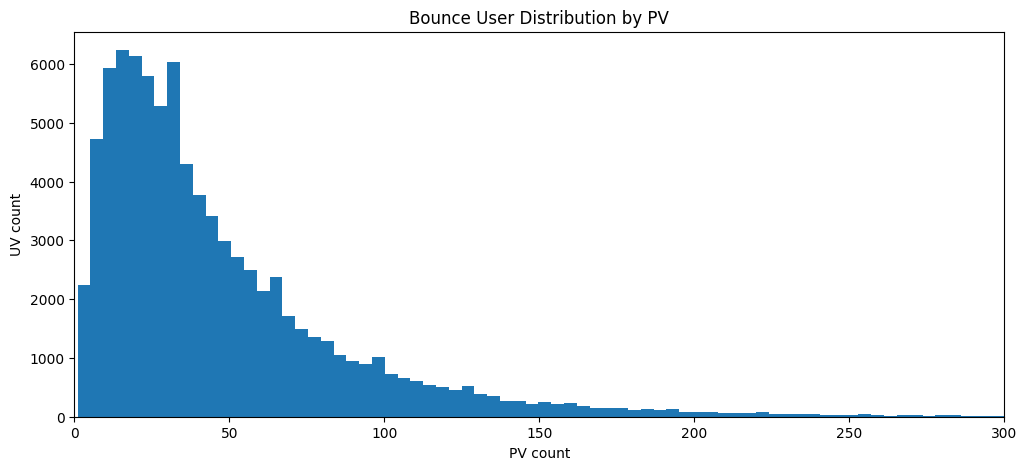

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(no_action_user["pv"], bins=200)
plt.xlim(0, 300)
plt.xlabel('PV count')
plt.ylabel('UV count')
plt.title('Bounce User Distribution by PV')
plt.show()

### 2.1.3 User Repurchase Rate

In [ ]:
repurchase_user = data_by_user[data_by_user['buy']>=2]
repurchase_user_count = repurchase_user.shape[0]
repurchase_rate = repurchase_user_count/total_UV
print(f"Repurchase rate is {repurchase_rate*100:.2f}%.")

Repurchase rate is 19.83%.


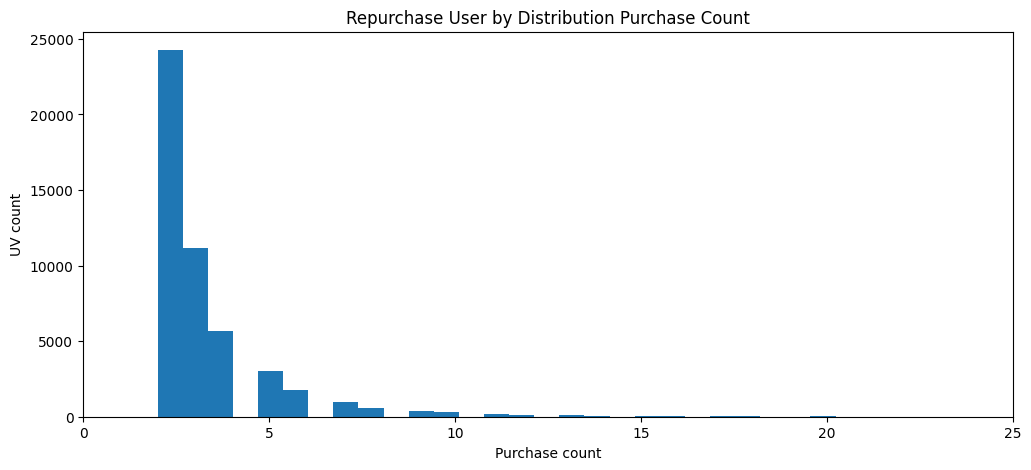

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(repurchase_user["buy"], bins=120)
plt.xlim(0, 25)
plt.xlabel('Purchase count')
plt.ylabel('UV count')
plt.title('Repurchase User by Distribution Purchase Count')
plt.show()

### 2.1.4 User Behavior Type Correlation Matrix

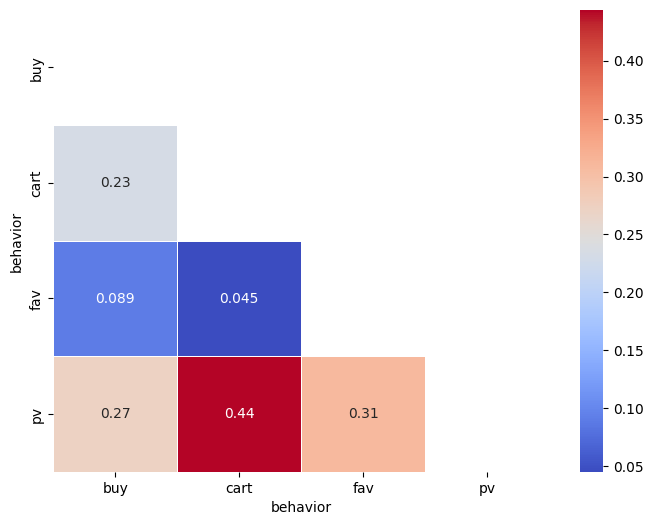

In [ ]:
corr_matrix = data_by_user.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## 2.2 User Behavior Funnel Analysis

In [ ]:
pv_data = data[data['behavior']=='pv'][['userID', 'itemID', 'categoryID', 'behavior']]
pv_data.columns = ['userID', 'itemID', 'categoryID', 'pv']

cart_like_data = data[(data['behavior']=='cart') | (data['behavior']=='fav')][['userID', 'itemID', 'categoryID', 'behavior']]
cart_like_data.columns = ['userID', 'itemID', 'categoryID', 'cart_like']

buy_data = data[data['behavior']=='buy'][['userID', 'itemID', 'categoryID', 'behavior']]
buy_data.columns = ['userID', 'itemID', 'categoryID', 'buy']

In [ ]:
# merge the view and cart_like data together for funnel analysis
pv_cart_like_data = pd.merge(pv_data, right=cart_like_data, how='left', on=['userID', 'itemID', 'categoryID'], suffixes=('_pv', '_cart_like_data'))
merge_data = pd.merge(pv_cart_like_data, right=buy_data, how='left', on=['userID', 'itemID', 'categoryID'], suffixes=('_pv_cart_like', '_buy_data'))

In [ ]:
test = merge_data.copy()
count = test.dropna(subset=['buy', 'cart_like']).shape[0]
print(count)

147099


In [ ]:
# calculate the view -> add to cart or favorate -> buy data, to get the funnel plot
pv_count = merge_data['pv'].count()
cart_like_count = merge_data['cart_like'].count()
buy_count = merge_data['buy'].count()
test_data = merge_data.copy()
cart_like_buy_count = test_data.dropna(subset=['buy', 'cart_like']).shape[0]

funnel_data = []
funnel_data.append(('pv_count', pv_count))
funnel_data.append(('cart_like_count', cart_like_count))
funnel_data.append(('buy_count', buy_count))
funnel_data.append(('cart_like_buy_count', cart_like_buy_count))
funnel_data

[('pv_count', 21079369),
 ('cart_like_count', 793427),
 ('buy_count', 658378),
 ('cart_like_buy_count', 147099)]

In [ ]:
%pip install plotly --quiet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade nbformat


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# note the actual "buy" data may come directly from pv, not through "add to cart or favorate"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
labels, values = zip(*funnel_data)

# seperate funnel plots
pv_count = values[0]
cart_like_count = values[1]
buy_count = values[2]
cart_like_buy_count = values[3]

# some users will buy directly from pv without adding to cart or favorate
direct_buy = buy_count - cart_like_buy_count

fig = make_subplots(rows=1, cols=2, subplot_titles=("Direct Buy", "Buy with Cart/Favorate"))

fig.add_trace(go.Funnel(
    y=["PV", "Direct Buy"],
    x=[pv_count, direct_buy],
    textinfo="value+percent initial",
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Funnel(
    y=["PV", "Cart/Like", "Buy"],
    x=[pv_count, cart_like_count, cart_like_buy_count],
    textinfo="value+percent initial",
    showlegend=False
), row=1, col=2)

fig.update_layout(title_text="User Behavior Funnel Plot", showlegend=False)

fig.show()

## 2.3 User Behavior Time Series Analysis

In [ ]:
# process the hour data based on the Time
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour

In [ ]:
data.head()

,userID,itemID,categoryID,behavior,date,Time,timeStamp,Hour
0,4,31827,982926,pv,2017-11-29,00:13:45,2017-11-29 00:13:45,0
1,4,127749,2465336,pv,2017-11-28,19:11:36,2017-11-28 19:11:36,19
2,4,138583,2465336,pv,2017-11-28,18:32:30,2017-11-28 18:32:30,18
3,4,147581,3299155,pv,2017-11-29,12:41:31,2017-11-29 12:41:31,12
4,4,156594,3313438,pv,2017-11-30,23:20:03,2017-11-30 23:20:03,23


### 2.3.1 Daily Trend

In [ ]:
pv_data = data[data['behavior']=='pv'][['date','behavior']]
pv_data.columns = ['date', 'pv_count']
daily_pv_data = pv_data.groupby("date").count()

cart_like_data = data[(data['behavior']=='cart') | (data['behavior']=='fav')][['date','behavior']]
cart_like_data.columns = ['date', 'cart_like_count']
daily_cart_like_data = cart_like_data.groupby("date").count()

buy_data = data[data['behavior']=='buy'][['date','behavior']]
buy_data.columns = ['date', 'buy_count']
daily_buy_data = buy_data.groupby("date").count()

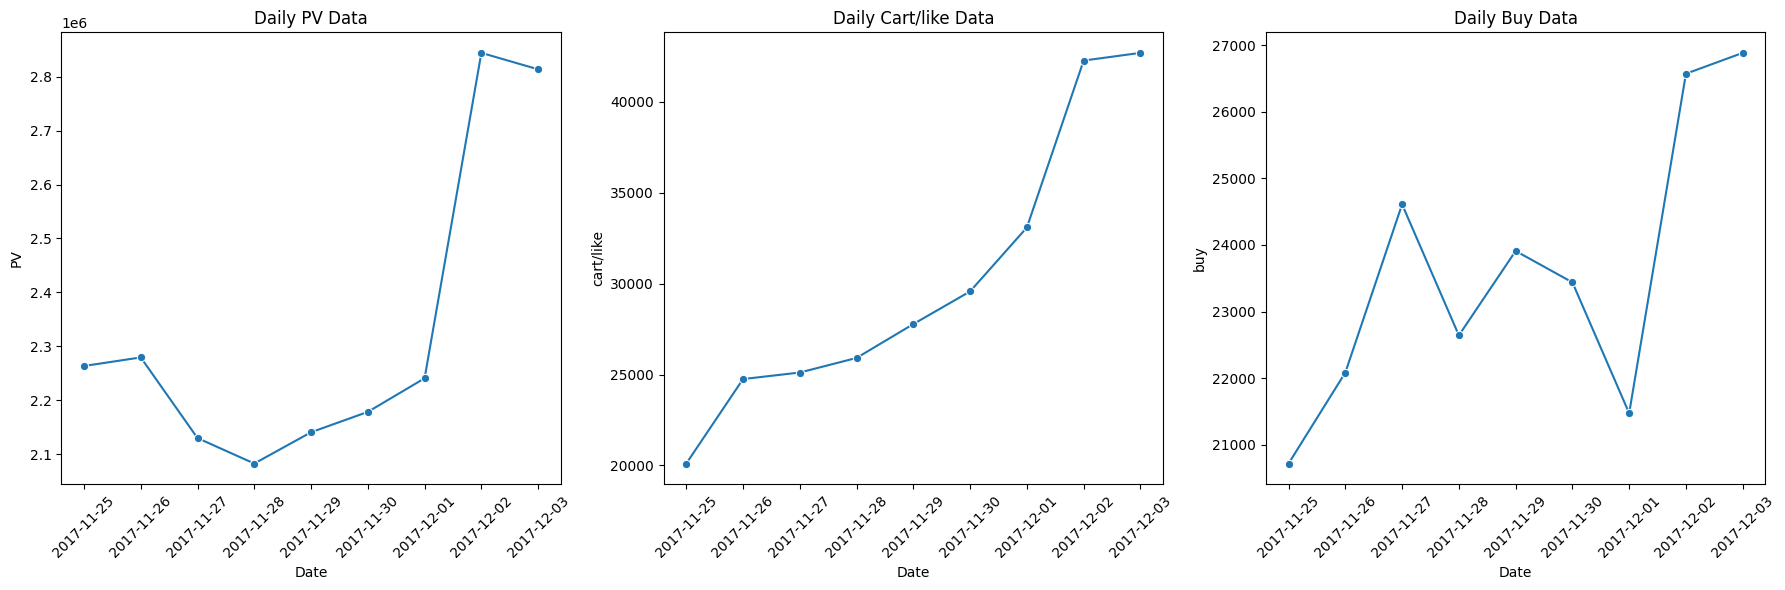

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

sns.lineplot(ax=axes[0], x='date', y='pv_count', data=daily_pv_data, marker='o')
axes[0].set_title('Daily PV Data')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('PV')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1], x='date', y='cart_like_count', data=daily_cart_like_data, marker='o')
axes[1].set_title('Daily Cart/like Data')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('cart/like')
axes[1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[2], x='date', y='buy_count', data=daily_buy_data, marker='o')
axes[2].set_title('Daily Buy Data')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('buy')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.3.2 Hourly Trend

In [ ]:
pv_data = data[data['behavior']=='pv'][['Hour','behavior']]
pv_data.columns = ['Hour', 'pv_count']
hourly_pv_data = pv_data.groupby("Hour").count()

cart_like_data = data[(data['behavior']=='cart') | (data['behavior']=='fav')][['Hour','behavior']]
cart_like_data.columns = ['Hour', 'cart_like_count']
hourly_cart_like_data = cart_like_data.groupby("Hour").count()

buy_data = data[data['behavior']=='buy'][['Hour','behavior']]
buy_data.columns = ['Hour', 'buy_count']
hourly_buy_data = buy_data.groupby("Hour").count()

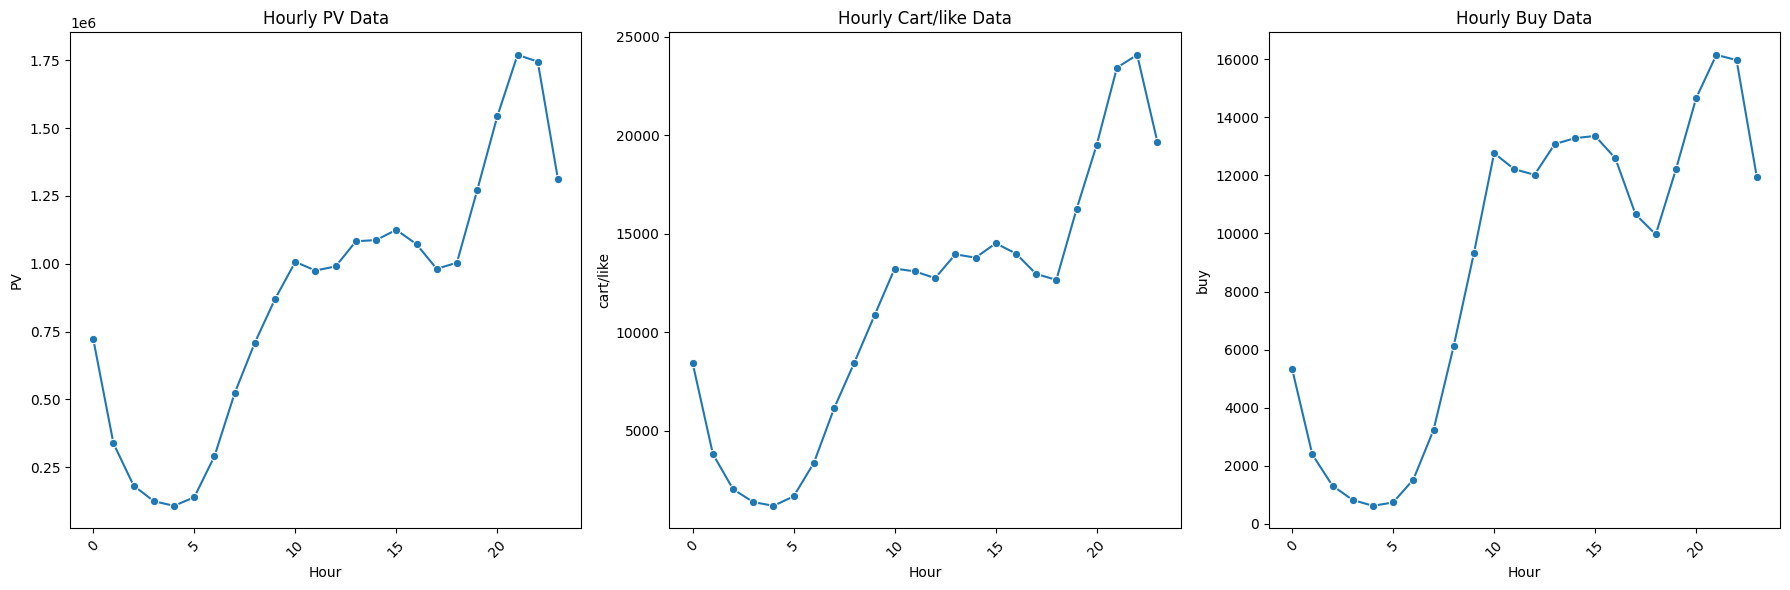

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

sns.lineplot(ax=axes[0], x='Hour', y='pv_count', data=hourly_pv_data, marker='o')
axes[0].set_title('Hourly PV Data')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('PV')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1], x='Hour', y='cart_like_count', data=hourly_cart_like_data, marker='o')
axes[1].set_title('Hourly Cart/like Data')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('cart/like')
axes[1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[2], x='Hour', y='buy_count', data=hourly_buy_data, marker='o')
axes[2].set_title('Hourly Buy Data')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('buy')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2.4 Analysis by Category

In [ ]:
data_by_category = data.groupby('categoryID')

In [ ]:
data_by_category_behavior = data_by_category['behavior'].value_counts().unstack()

# fill the null value with 0
data_by_category_behavior.replace(to_replace=np.nan, value=0, inplace=True)
data_by_category_behavior = data_by_category_behavior.sort_values(by='buy', ascending=False)
data_by_category_behavior['p_to_buy_conversion_rate'] = data_by_category_behavior['buy']/data_by_category_behavior['pv']

In [ ]:
# top 10 selling category
data_by_category_behavior.head(10)

behavior,buy,cart,fav,pv,p_to_buy_conversion_rate
categoryID,,,,,
4145813,3748.00,6407.00,3295.00,721073.00,0.01
1464116,3437.00,1858.00,635.00,159093.00,0.02
4756105,3401.00,8365.00,4579.00,1032431.00,0.00
2735466,3370.00,2899.00,951.00,260955.00,0.01
2885642,3361.00,1792.00,798.00,224399.00,0.01
4801426,3120.00,4282.00,1796.00,428129.00,0.01
982926,2877.00,5343.00,2288.00,651821.00,0.00
2640118,2190.00,2005.00,486.00,169500.00,0.01
1320293,2139.00,3371.00,1383.00,420756.00,0.01


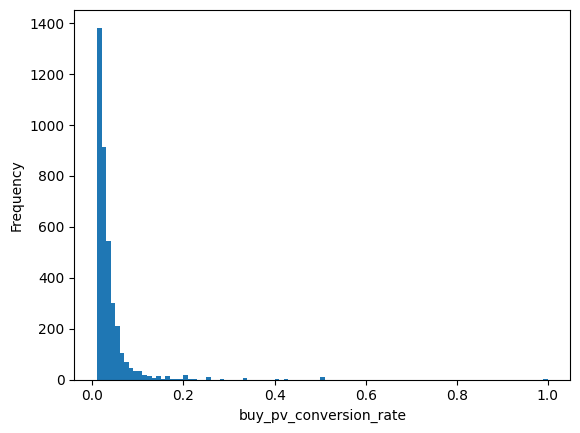

In [ ]:
bins = np.linspace(0.01, 1, 100)

plt.hist(data_by_category_behavior['p_to_buy_conversion_rate'], bins=bins)
plt.xlabel('buy_pv_conversion_rate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_by_category_behavior['cumsum'] = data_by_category_behavior['buy'].cumsum()

In [ ]:
threshold = data_by_category_behavior['buy'].sum()*0.8

In [ ]:
data_by_category_behavior['type'] = data_by_category_behavior['cumsum'].map(lambda x: 'up_80' if x<=threshold else 'down_20')
data_by_category_counts=data_by_category_behavior['type'].value_counts()
data_by_category_counts

type
down_20    7974
up_80       671
Name: count, dtype: int64

In [ ]:
data_by_category_behavior

behavior,buy,cart,fav,pv,p_to_buy_conversion_rate,cumsum,type
categoryID,,,,,,,
4145813,3748.00,6407.00,3295.00,721073.00,0.01,3748.00,up_80
1464116,3437.00,1858.00,635.00,159093.00,0.02,7185.00,up_80
4756105,3401.00,8365.00,4579.00,1032431.00,0.00,10586.00,up_80
2735466,3370.00,2899.00,951.00,260955.00,0.01,13956.00,up_80
2885642,3361.00,1792.00,798.00,224399.00,0.01,17317.00,up_80
...,...,...,...,...,...,...,...
2863631,0.00,0.00,0.00,4.00,0.00,212326.00,down_20
626403,0.00,0.00,0.00,1.00,0.00,212326.00,down_20
2860524,0.00,0.00,0.00,23.00,0.00,212326.00,down_20


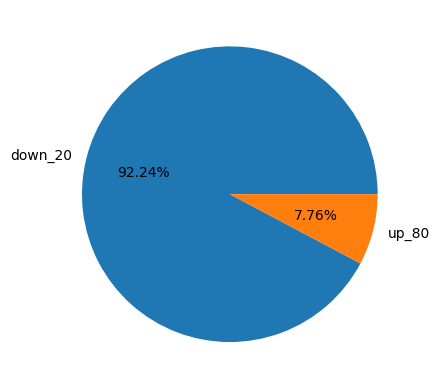

In [ ]:
# most selling is contributed by minority category items
plt.figure()
plt.pie(x=data_by_category_counts, labels=data_by_category_counts.index,autopct='%1.2f%%')
plt.show()

# 3. Model

## 3.1 Hyperparameter-Tuned Decision Tree Model for Predicting Purchases

In [ ]:
%pip install imbalanced-learn --quiet

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np


In [18]:
# randomly select 3% of unique userIDs to avoid long running time
sampled_userIDs = data['userID'].drop_duplicates().sample(frac=0.03, random_state=42)

# create a new dataframe with only the sampled userID's behavior data
model_data = data[data['userID'].isin(sampled_userIDs)].copy()

# make payment as the target goal, which is 1, rest is all 0
model_data['is_buy'] = np.where(model_data['behavior'] == 'buy', 1, 0)

model_data['date'] = pd.to_datetime(model_data['date'], errors='coerce')
model_data['day'] = model_data['date'].dt.day
model_data['month'] = model_data['date'].dt.month
model_data['day_of_week'] = model_data['date'].dt.dayofweek
model_data['hour'] = pd.to_datetime(model_data['Time'], format='%H:%M:%S').dt.hour


In [19]:
model_data.head()

,userID,itemID,categoryID,behavior,date,Time,timeStamp,is_buy,day,month,day_of_week,hour
950,183,6113,4756105,pv,2017-12-02,22:16:40,2017-12-02 22:16:40,0,2,12,5,22
951,183,6113,4756105,pv,2017-12-02,22:17:06,2017-12-02 22:17:06,0,2,12,5,22
952,183,55238,4756105,pv,2017-11-25,22:32:03,2017-11-25 22:32:03,0,25,11,5,22
953,183,55238,4756105,pv,2017-11-26,07:50:27,2017-11-26 07:50:27,0,26,11,6,7
954,183,55238,4756105,pv,2017-11-30,21:29:55,2017-11-30 21:29:55,0,30,11,3,21


In [20]:
model_data.describe()

,userID,itemID,categoryID,date,timeStamp,is_buy,day,month,day_of_week,hour
count,6.474260e+05,6.474260e+05,6.474260e+05,647426,647426,647426.000000,647426.000000,647426.000000,647426.000000,647426.000000
mean,5.067624e+05,2.578293e+06,2.699761e+06,2017-11-29 05:19:49.398015488,2017-11-29 20:43:21.834476288,0.010057,17.805922,11.380539,3.718995,14.892162
min,1.830000e+02,6.400000e+01,2.171000e+03,2017-11-25 00:00:00,2017-11-25 00:00:01,0.000000,1.000000,11.000000,0.000000,0.000000
25%,2.560100e+05,1.290569e+06,1.349561e+06,2017-11-27 00:00:00,2017-11-27 13:12:37,0.000000,3.000000,11.000000,2.000000,11.000000
50%,5.002630e+05,2.577749e+06,2.667323e+06,2017-11-29 00:00:00,2017-11-29 21:41:18.500000,0.000000,26.000000,11.000000,4.000000,16.000000
75%,7.632360e+05,3.858460e+06,4.141018e+06,2017-12-02 00:00:00,2017-12-02 09:35:00.500000,0.000000,28.000000,12.000000,5.000000,20.000000
max,1.017943e+06,5.163069e+06,5.161669e+06,2017-12-03 00:00:00,2017-12-03 23:59:42,1.000000,30.000000,12.000000,6.000000,23.000000
std,2.939552e+05,1.489134e+06,1.454119e+06,NaN,NaN,0.099778,12.409374,0.485520,2.047273,6.091589


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Define features and target
X = model_data[['hour','day_of_week','categoryID']].copy()
y = model_data['is_buy']

# Encode X columns
X['day_of_week'] = label_encoder.fit_transform(X['day_of_week'])
X['hour'] = label_encoder.fit_transform(X['hour'])
X['categoryID'] = label_encoder.fit_transform(X['categoryID'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grid for DecisionTreeClassifier
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
cv = GridSearchCV(pipeline, param_grid, cv=5)

# cv = RandomizedSearchCV(pipeline, param_grid, cv=5, n_iter=30, n_jobs=-1, random_state=42)  # n_iter limits parameter combinations to process faster

# Fit the model to the training data
cv.fit(X_train, y_train)

# Get the best model
best_model = cv.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Best Model Parameters: {cv.best_params_}\n")
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix:\n {conf_matrix}\n")
print(f"Classification Report:\n {class_report}")


Best Model Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}

Accuracy: 0.9896359451987088

Confusion Matrix:
 [[128144      1]
 [  1341      0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    128145
           1       0.00      0.00      0.00      1341

    accuracy                           0.99    129486
   macro avg       0.49      0.50      0.50    129486
weighted avg       0.98      0.99      0.98    129486



## 3.2 Logistic Regression to Predict User Purchase

In [22]:
# create new dataframe use user as base
user_base_data = model_data.groupby('userID').agg({
    'behavior': lambda x: x.value_counts().to_dict(),
    'is_buy': lambda x: 1 if x.sum() > 0 else 0,
    'itemID': 'count'
}).reset_index()

# rename
user_base_data.columns = ['userID', 'action_summary', 'is_buy', 'total_actions']


user_base_data.head()

,userID,action_summary,is_buy,total_actions
0,183,"{'pv': 120, 'cart': 5, 'buy': 2}",1,127
1,202,"{'pv': 21, 'fav': 2}",0,23
2,402,{'pv': 52},0,52
3,405,{'pv': 11},0,11
4,507,"{'pv': 121, 'cart': 2, 'buy': 2}",1,125


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# use total actions to predict final purchase
X = user_base_data[['total_actions']]
y = user_base_data['is_buy']

# set train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression initialization
model = LogisticRegression()
model.fit(X_train, y_train)

# model metrics

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train accuracy: {train_score:.2f}")
print(f"Test accuracy: {test_score:.2f}")

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

Train accuracy: 0.62
Test accuracy: 0.63
AUC-ROC: 0.6699450571303572


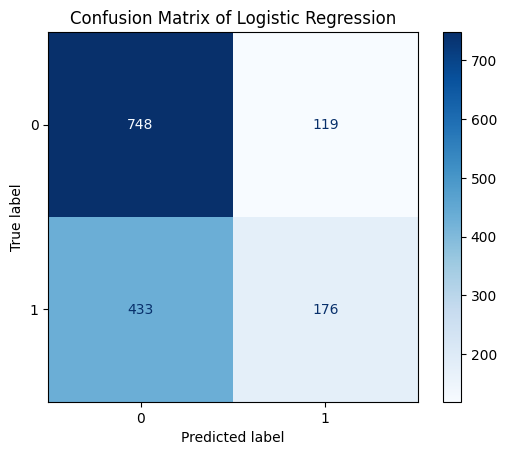

In [24]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

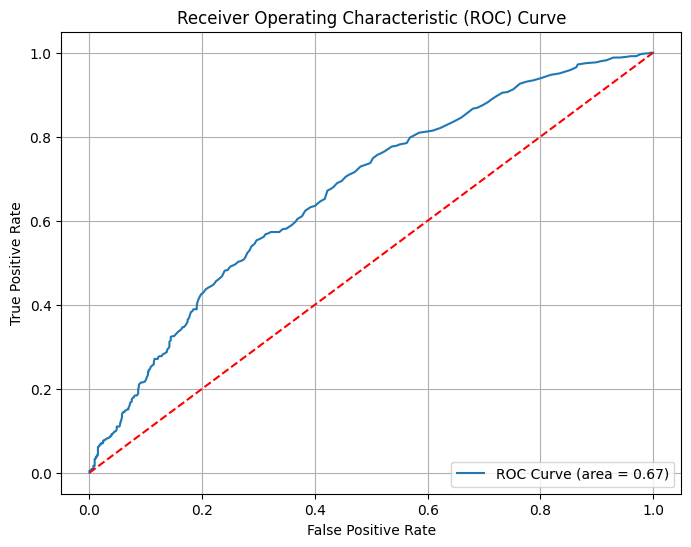

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 3.3 5-Fold Cross Validation

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

action_df = pd.DataFrame(user_base_data)

# only consider actions exclude buy
action_df['pv_count'] = action_df['action_summary'].apply(lambda x: x.get('pv', 0))
action_df['fav_count'] = action_df['action_summary'].apply(lambda x: x.get('fav', 0))
action_df['cart_count'] = action_df['action_summary'].apply(lambda x: x.get('cart', 0))
action_df['buy_count'] = action_df['action_summary'].apply(lambda x: x.get('buy', 0))


In [27]:
action_df.head()

,userID,action_summary,is_buy,total_actions,pv_count,fav_count,cart_count,buy_count
0,183,"{'pv': 120, 'cart': 5, 'buy': 2}",1,127,120,0,5,2
1,202,"{'pv': 21, 'fav': 2}",0,23,21,2,0,0
2,402,{'pv': 52},0,52,52,0,0,0
3,405,{'pv': 11},0,11,11,0,0,0
4,507,"{'pv': 121, 'cart': 2, 'buy': 2}",1,125,121,0,2,2


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# features and target - 'total_actions',
features = [ 'pv_count', 'fav_count', 'cart_count']
X = action_df[features]
y = action_df['is_buy']

# new pipeline with scaling and random forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=22, class_weight='balanced'))
])

# scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc'
}

# 5-fold cross-validation
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=True)

# to print and calculate mean and std of scores
def print_scores(scores, score_name):
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{score_name}: {mean_score:.2f} (+/- {std_score:.2f})")

# for each scoring and metric, print the result
print("Cross-validation results:")
for metric in scoring.keys():
    print(f"\n{metric.capitalize()}:")
    print_scores(cv_results[f'train_{metric}'], "Train")
    print_scores(cv_results[f'test_{metric}'], "Test")

# feature importances
pipeline.fit(X, y)
feature_importance = pipeline.named_steps['rf'].feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Cross-validation results:

Accuracy:
Train: 0.76 (+/- 0.00)
Test: 0.59 (+/- 0.01)

Roc_auc:
Train: 0.84 (+/- 0.00)
Test: 0.60 (+/- 0.01)

Feature Importances:
      feature  importance
0    pv_count    0.845801
2  cart_count    0.112990
1   fav_count    0.041208


5 Fold Cross-validation results:


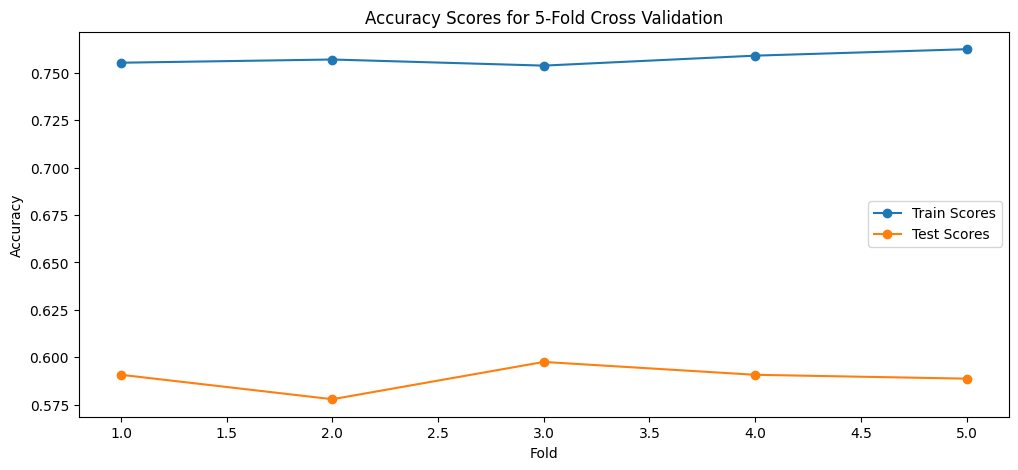

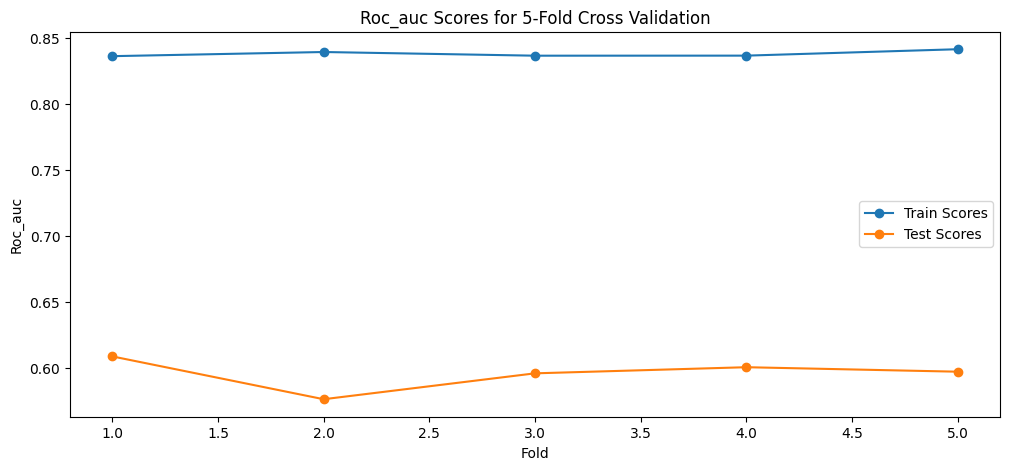

In [29]:
# plot the cross-validation scores
def plot_cv_scores(cv_results, metric_name):
    train_scores = cv_results[f'train_{metric_name}']
    test_scores = cv_results[f'test_{metric_name}']

    plt.figure(figsize=(12, 5))
    plt.plot(range(1, 6), train_scores, marker='o', label='Train Scores')
    plt.plot(range(1, 6), test_scores, marker='o', label='Test Scores')
    plt.xlabel("Fold")
    plt.ylabel(metric_name.capitalize())
    plt.title(f"{metric_name.capitalize()} Scores for 5-Fold Cross Validation")
    plt.legend()
    plt.show()

print("5 Fold Cross-validation results:")
for metric in scoring.keys():
    plot_cv_scores(cv_results, metric)

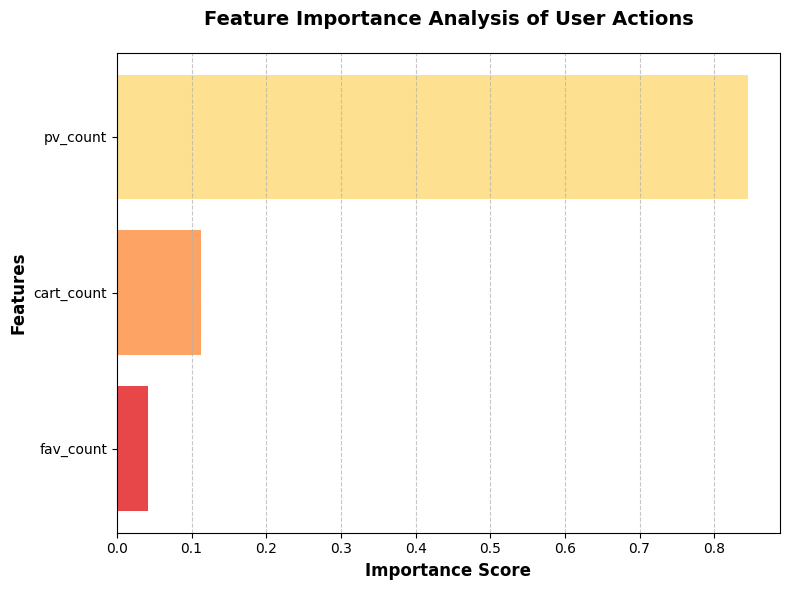

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# color
colors = sns.color_palette("YlOrRd", len(feature_importance_df))

# plot
plt.figure(figsize=(8, 6))

# horizontal bar chart with gradient colors
bars = plt.barh(feature_importance_df['feature'],
                feature_importance_df['importance'],
                color=colors,
                alpha=0.8)

# titles
plt.xlabel("Importance Score", fontsize=12, fontweight='bold')
plt.ylabel("Features", fontsize=12, fontweight='bold')
plt.title("Feature Importance Analysis of User Actions",
          fontsize=14,
          fontweight='bold',
          pad=20)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3.4 SVR
Support Vector Regression (SVR) is used regression modeling, which could provide a continuous value or numeric score. For Taobao's case, SVR could be utilitized to calculate the possibility of purchase of target user when the user actions are given. Based on different purchase score/likelihood index, the platform could take more actions to attract the target customer to make purchase.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# features and target
features = ['pv_count', 'fav_count', 'cart_count']
X = action_df[features]
y = action_df['is_buy']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# handle unbalanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# scaling and SVR model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('svr', SVR())  # Initialize SVR
])

# parameter for Randomized Search
param_dist = {
    'svr__kernel': ['rbf', 'linear'],  # only use two to run faster
    'svr__C': np.logspace(-1, 2, 4),
    'svr__epsilon': [0.1],
}

# Randomized Search with Cross-Validation to save processing time
random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_sm, y_train_sm)

# get best model
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

# MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Best parameters: {random_search.best_params_}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mean Squared Error: 0.26
R^2 Score: -0.06
Best parameters: {'svr__kernel': 'linear', 'svr__epsilon': 0.1, 'svr__C': 0.1}


<p>For each customer, based on past action, the purchase likelihood could be calculated in a number from 0 to 1. By utilitizing this score, Taobao could provide more customized recommendation for those users whose score is relatively high.


In [32]:
print("Predicted Purchase Likelihood Scores:", y_pred)

Predicted Purchase Likelihood Scores: [0.28932946 0.08541542 0.46149005 ... 0.10905763 0.44861345 0.12678928]


<p> Residuals are the differences between the actual values  and the predicted value. Residuals could tell how is the model performing. The closer to 0, the better the performance.


Mean Absolute Error: 0.42


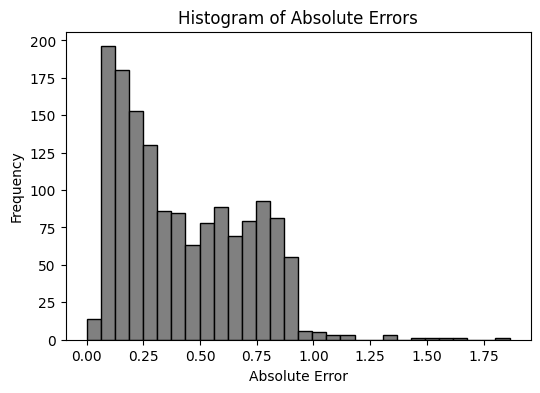

In [33]:
from sklearn.metrics import mean_absolute_error
absolute_errors = abs(y_test - y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Plot histogram of absolute errors
plt.figure(figsize=(6, 4))
plt.hist(absolute_errors, bins=30, color='grey', edgecolor='black')
plt.title('Histogram of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

## 3.5 KMeans

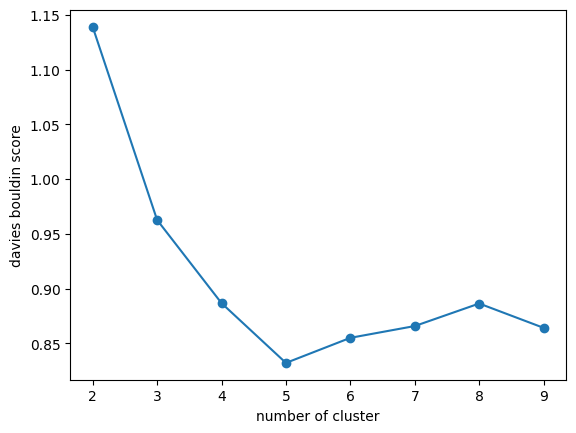

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# feature selection
features = ['buy', 'cart', 'fav']
user_action_count = data_by_user[features]

# daily average count
daily_avg_user_action_count = user_action_count / 9

from sklearn.metrics import davies_bouldin_score

k_values = range (2,10)
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(daily_avg_user_action_count)
    scores.append(davies_bouldin_score(daily_avg_user_action_count,cluster_labels))

# plot the index
plt.plot(k_values, scores, marker='o')
plt.xlabel('number of cluster')
plt.ylabel('davies bouldin score')
plt.show()

In [ ]:
optimal_k = k_values[np.argmin(scores)]
print(optimal_k)

5


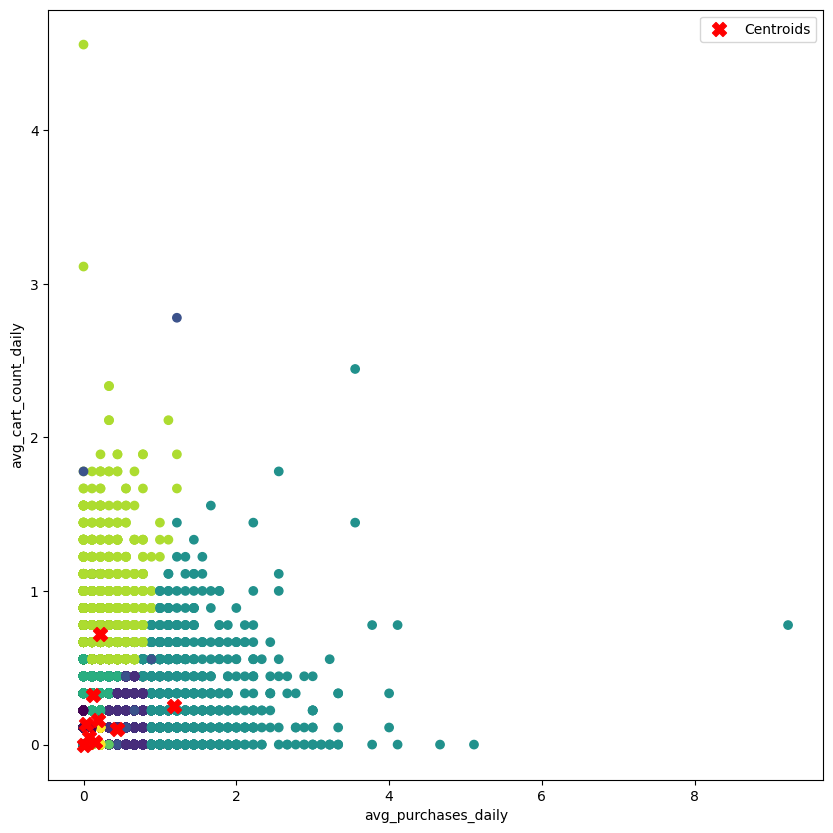

In [ ]:

kmeans_best = KMeans(n_clusters=optimal_k,random_state=42, n_init=10)
daily_avg_user_action_count['KMeans_labels'] = kmeans.fit_predict(daily_avg_user_action_count)

plt.figure(figsize=(10,10))
plt.scatter(daily_avg_user_action_count['buy'], daily_avg_user_action_count['cart'], c=daily_avg_user_action_count['KMeans_labels'], cmap = 'viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.xlabel('avg_purchases_daily')
plt.ylabel('avg_cart_count_daily')
plt.legend()
plt.show()


## 3.6 Time Series Analysis

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [ ]:
import statsmodels.api as sm
model_data['datehour'] = pd.to_datetime(model_data['date'].astype(str) + ' ' + model_data['Hour'].astype(str))
pv_data = model_data[model_data['behavior']=='pv']
buy_data = model_data[model_data['behavior']=='buy']
count_per_hour = pv_data.groupby('datehour').size().reset_index(name='count')

In [ ]:
count_per_hour.head()

,datehour,count
0,2017-11-25 00:00:00,1491
1,2017-11-25 01:00:00,675
2,2017-11-25 02:00:00,415
3,2017-11-25 03:00:00,229
4,2017-11-25 04:00:00,263


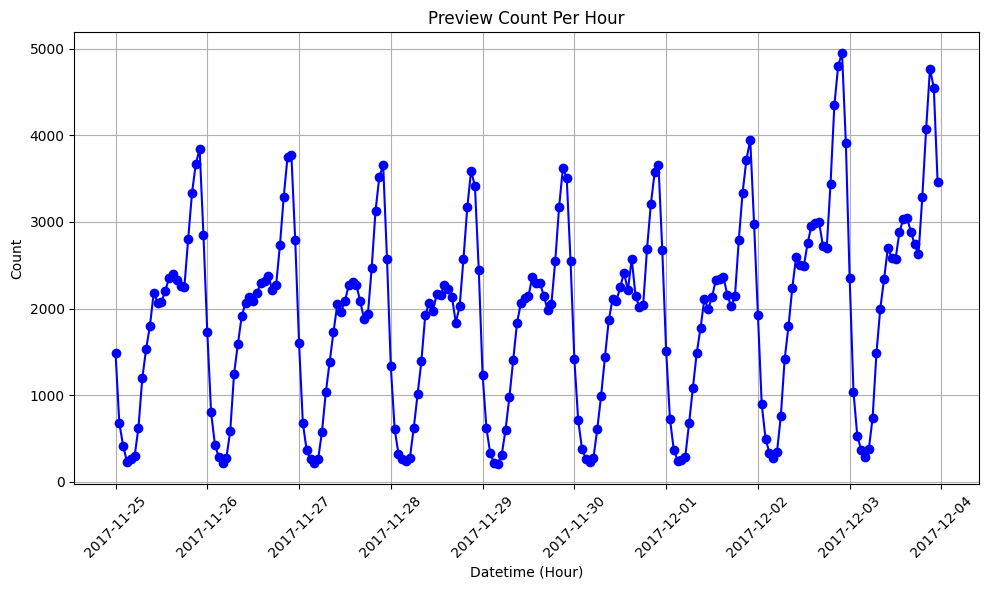

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(count_per_hour['datehour'], count_per_hour['count'], marker='o', linestyle='-', color='b')
plt.xlabel('Datetime (Hour)')
plt.ylabel('Count')
plt.title('Preview Count Per Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

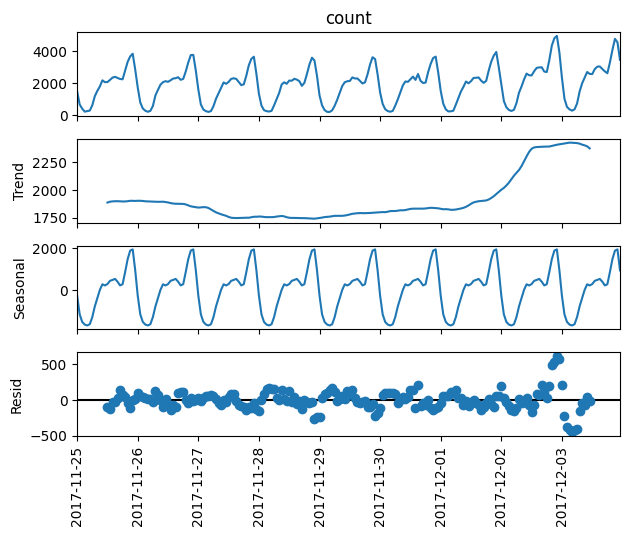

In [ ]:
count_per_hour = count_per_hour.reset_index().set_index('datehour')
decomposition = sm.tsa.seasonal_decompose(count_per_hour['count'])
decomposition.plot()

# Rotate the x-axis labels
plt.xticks(rotation=90)
plt.show()
count_per_hour.drop('index', axis=1, inplace=True)

In [ ]:
# Split the dataset into training and test sets
# The training set consists of all data points except the last 60
# Note: No shuffling or random splitting; the order is maintained
count_per_hour_train = count_per_hour[:-40]
# The test set includes the last 60 data points
count_per_hour_test = count_per_hour[-40:]

# Print the shapes of the training and test sets
# Note: No shuffling or random splitting; the order is maintained
print(count_per_hour_train.shape)
print(count_per_hour_test.shape)

NameError: name 'count_per_hour' is not defined

In [ ]:
import pmdarima as pm

auto_arima = pm.auto_arima(count_per_hour_train, stepwise=False, seasonal=False)

auto_arima

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(count_per_hour_test))
count_per_hour['forecast_auto'] = [None]*len(count_per_hour_train) + list(forecast_test_auto)

count_per_hour.plot(figsize=(12, 6))

In [ ]:
model_data['minute'] = pd.to_datetime(model_data['Time'], format='%H:%M:%S').dt.hour.astype(str) + ":" + pd.to_datetime(model_data['Time'], format='%H:%M:%S').dt.minute.astype(str)
model_data['dateminute'] = pd.to_datetime(model_data['date'].astype(str) + ' ' + model_data['minute'].astype(str))
pv_data = model_data[model_data['behavior']=='pv']
buy_data = model_data[model_data['behavior']=='buy']
count_per_minute = pv_data.groupby('dateminute').size().reset_index(name='count')
count_per_minute = count_per_minute.reset_index().set_index('dateminute')
del count_per_minute['index']
count_per_minute_train = count_per_minute[:-2000]
count_per_minute_test = count_per_minute[-2000:]
import pmdarima as pm
auto_arima = pm.auto_arima(count_per_minute_train, stepwise=False, seasonal=False)
forecast_test_auto = auto_arima.predict(n_periods=len(count_per_minute_test))
count_per_minute['forecast_auto'] = [None]*len(count_per_minute_train) + list(forecast_test_auto)
count_per_minute.plot(figsize=(24, 12))

# 4. Streamlit App

In [ ]:
%pip install streamlit --quiet --upgrade
%pip install pygwalker --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 5

In [ ]:
data.dtypes

,0
userID,int64
itemID,int64
categoryID,int64
behavior,object
date,object
Time,object
Hour,int32


In [ ]:
%%writefile taobao_data_app.py
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pygwalker.api.streamlit import StreamlitRenderer
from imblearn.over_sampling import SMOTE



st.set_page_config(
    page_title="User Purchase Prediction Using Different Actions",
    layout="wide"
)


st.title('User Purchase Prediction Using Different Actions')

# load action data csv file
action_df = pd.read_csv('action_data.csv')

if action_df.empty:
    st.error("The action_data.csv is empty.")
else:
    st.success("action_data.csv loaded successfully!")

# two tabs
tab1, tab2, tab3 = st.tabs(["User Action Data", "User Purchase Prediction", "Action Importance"])

# User Action csv
with tab1:
    #columns = action_df.columns.tolist()
    #sort_column = st.selectbox("Sort by", columns)
    #ascending = st.checkbox("Sort in ascending order?", value=True)

    # Sort and display the dataframe
    #sorted_df = action_df.sort_values(by=sort_column, ascending=ascending)
    #st.write(f"Dataframe Sorted by {sort_column}")
    #st.dataframe(sorted_df)
    vis_spec = r"""{"config":[{"config":{"defaultAggregated":true,"geoms":["auto"],"coordSystem":"generic","limit":-1,"timezoneDisplayOffset":0,"folds":[]},"encodings":{"dimensions":[{"fid":"action_summary","name":"action_summary","basename":"action_summary","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"is_buy","name":"is_buy","basename":"is_buy","semanticType":"quantitative","analyticType":"dimension","offset":0},{"fid":"fav_count","name":"fav_count","basename":"fav_count","semanticType":"quantitative","analyticType":"dimension","offset":0},{"fid":"cart_count","name":"cart_count","basename":"cart_count","semanticType":"quantitative","analyticType":"dimension","offset":0},{"fid":"buy_count","name":"buy_count","basename":"buy_count","semanticType":"quantitative","analyticType":"dimension","offset":0},{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"}],"measures":[{"fid":"userID","name":"userID","basename":"userID","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"total_actions","name":"total_actions","basename":"total_actions","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"pv_count","name":"pv_count","basename":"pv_count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"gw_count_fid","name":"Row count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","computed":true,"expression":{"op":"one","params":[],"as":"gw_count_fid"}},{"fid":"gw_mea_val_fid","name":"Measure values","analyticType":"measure","semanticType":"quantitative","aggName":"sum"}],"rows":[{"fid":"buy_count","name":"buy_count","basename":"buy_count","semanticType":"quantitative","analyticType":"dimension","offset":0}],"columns":[{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"},{"fid":"fav_count","name":"fav_count","basename":"fav_count","semanticType":"quantitative","analyticType":"dimension","offset":0},{"fid":"pv_count","name":"pv_count","basename":"pv_count","analyticType":"measure","semanticType":"quantitative","aggName":"mean","offset":0},{"fid":"total_actions","name":"total_actions","basename":"total_actions","analyticType":"measure","semanticType":"quantitative","aggName":"mean","offset":0}],"color":[{"fid":"pv_count","name":"pv_count","basename":"pv_count","analyticType":"measure","semanticType":"quantitative","aggName":"count","offset":0}],"opacity":[],"size":[],"shape":[{"fid":"userID","name":"userID","basename":"userID","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0}],"radius":[],"theta":[],"longitude":[],"latitude":[],"geoId":[],"details":[],"filters":[],"text":[]},"layout":{"showActions":false,"showTableSummary":false,"stack":"stack","interactiveScale":false,"zeroScale":true,"size":{"mode":"auto","width":320,"height":200},"format":{},"geoKey":"name","resolve":{"x":false,"y":false,"color":false,"opacity":false,"shape":false,"size":false}},"visId":"gw_ZYhq","name":"Chart 1"}],"chart_map":{},"workflow_list":[{"workflow":[{"type":"view","query":[{"op":"aggregate","groupBy":["fav_count","buy_count"],"measures":[{"field":"pv_count","agg":"mean","asFieldKey":"pv_count_mean"},{"field":"total_actions","agg":"mean","asFieldKey":"total_actions_mean"},{"field":"pv_count","agg":"count","asFieldKey":"pv_count_count"},{"field":"userID","agg":"sum","asFieldKey":"userID_sum"}]}]}]}],"version":"0.4.9.10"}"""


    pyg_app = StreamlitRenderer(action_df, spec=vis_spec)
    pyg_app.explorer()

# User Purchase Prediction
with tab2:
    # input and target - To be updated to other fields
    features = ['total_actions', 'pv_count', 'fav_count', 'cart_count']

    missing_features = [feature for feature in features if feature not in action_df.columns]
    if missing_features:
        st.error(f"Missing columns in action_df: {', '.join(missing_features)}")

    X = action_df[features]
    y = action_df['is_buy']

    # create session state
    if 'total_actions' not in st.session_state:
        st.session_state.total_actions = 0
    if 'pv_count' not in st.session_state:
        st.session_state.pv_count = 0
    if 'fav_count' not in st.session_state:
        st.session_state.fav_count = 0
    if 'cart_count' not in st.session_state:
        st.session_state.cart_count = 0

    # get user inputs and update session state
    pv_count = st.number_input('Page View Count', min_value=0, step=1, value=st.session_state.pv_count)
    fav_count = st.number_input('Favorite Count', min_value=0, step=1, value=st.session_state.fav_count)
    cart_count = st.number_input('Cart Count', min_value=0, step=1, value=st.session_state.cart_count)
    total_actions = pv_count + fav_count + cart_count

    # session state with input values
    st.session_state.total_actions = total_actions
    st.session_state.pv_count = pv_count
    st.session_state.fav_count = fav_count
    st.session_state.cart_count = cart_count

    # create input data df
    input_data = pd.DataFrame([[total_actions, pv_count, fav_count, cart_count]], columns=features)

    # train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

    # RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    clf.fit(X_train_sm, y_train_sm)

    # predict using inputs
    prediction = clf.predict(input_data)[0]
    prediction_prob = clf.predict_proba(input_data)[:, 1][0]

    # display the result on website
    st.write(f"Prediction (Will This Client Finally Buy?): {'Yes' if prediction == 1 else 'No'}")
    st.write(f"Probability of Purchase: {prediction_prob:.2f}")
    # st.write(classification_report(y_test, y_pred))


with tab3:
    # feature importances
    importances = clf.feature_importances_
    feature_importance_df = pd.DataFrame(importances, index=features, columns=["Importance"])
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

    st.write("### Action Importance to Final Purchase")
    st.bar_chart(feature_importance_df)


Overwriting taobao_data_app.py


In [ ]:
!streamlit run taobao_data_app.py --server.port 8504




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8504
  Network URL: http://172.28.0.12:8504
  External URL: http://35.193.5.116:8504



# 5. Taobao Shopping Customized AI Assistant

In [ ]:
import pandas as pd
from openai import OpenAI
import getpass  # Import getpass to securely prompt for the API key
import os

# Load the first 30 rows from the CSV file
df = pd.read_csv('SelectedUserBehavior.csv', nrows=300)
df['userID'] = df['userID'].astype(str)  # Ensure userID is treated as a string

df['timeStamp'] = pd.to_datetime(df['date'] + ' ' + df['Time']) # Convert 'timedate' column to datetime

# Prompt the user to enter the OpenAI API key without displaying it
api_key = getpass.getpass("Enter your OpenAI API key: ")
os.environ["OPENAI_API_KEY"] = api_key

client = OpenAI()

def get_recent_item(user_id):
    # Filter data for the specified user
    user_data = df[df['userID'] == user_id]

    if not user_data.empty:
        # Find the most recent item the user interacted with
        recent_item = user_data.sort_values(by='timeStamp', ascending=False).iloc[0]['itemID']
        return recent_item
    return None

def create_chat(conversation_history):

    try:
      response = client.chat.completions.create(
          model="gpt-4o-mini-2024-07-18",
          messages=conversation_history,
          temperature=0.9,
          max_tokens=300,
          top_p=1,
          frequency_penalty=1,
          presence_penalty=0.5
      )

      assistant_reply = response.choices[0].message.content
      print(f"Assistant: {assistant_reply}")
    except openai.APIConnectionError as e:
        """
        Handles errors where the server could not be reached.
        Prints the error message and the underlying exception.
        """
        print("The server could not be reached")
        print(e.__cause__)
    except openai.RateLimitError as e:
        """
        Handles errors where a 429 status code was received, indicating rate limiting.
        Prints a message and backs off a bit to avoid further rate limiting.
        """
        print("A 429 status code was received; we should back off a bit.")
    except openai.APIStatusError as e:
        """
        Handles errors where a non-200-range status code was received.
        Prints the status code and response for debugging.
        """
        print("Another non-200-range status code was received")
        print(e.status_code)
        print(e.response)
    return assistant_reply

def chat_with_openai():
    # Get user ID as input for customization
    user_id = input("Enter your User ID: ")
    user_id = str(user_id)  # make it a string

    # most recent item the user interacted with
    recent_item = get_recent_item(user_id)

    # Customize the initial prompt
    if recent_item:
        initial_prompt = f"You are a helpful assistant on Taobao. Your job is to interact more with the user to make them purchase. The user recently interacted with item ID {recent_item}. Recommend related products and start a friendly conversation."
    else:
        initial_prompt = "You are a helpful assistant on Taobao. Your job is to interact more with the user to make them purchase. This is a new user. Provide some general recommendations."

    # Initialize the conversation history with a system message
    conversation_history = [{"role": "system", "content": initial_prompt},
                             {"role": "user", "content": "Write a greeting message to me. And then can you help to share the item I view recently if any? Recommend the product to me in an interesting way."}
                            ]
    assistant_reply = create_chat(conversation_history)


    while True:
        # Add the assistant's reply to the conversation history
        conversation_history.append({"role": "assistant", "content": assistant_reply})

        # Get user input
        user_input = input("You: ")

        # Exit the loop if the user types 'quit'
        if user_input.lower() == "quit":
            print("Ending the conversation. Goodbye! Hope you enjoy the day at Taobao!")
            break

        conversation_history.append({"role": "user", "content": user_input})

        # Get the AI's response
        assistant_reply = create_chat(conversation_history)

if __name__ == "__main__":
    chat_with_openai()
